<a href="https://colab.research.google.com/github/jihnrhd/NLP_Repo/blob/main/NLP_Starbuck_Review_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preprocessing

In [1]:
import pandas as pd
data = pd.read_csv('/content/reviews_data.csv')
data.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [2]:
data.shape

(850, 6)

## Cleaning data
menghapus kolom yang tidak diperlukan

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         850 non-null    object 
 1   location     850 non-null    object 
 2   Date         850 non-null    object 
 3   Rating       705 non-null    float64
 4   Review       850 non-null    object 
 5   Image_Links  850 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.0+ KB


In [4]:
data.drop(['name', 'location', 'Date', 'Image_Links'], axis=1, inplace=True)

membersikan teks dari kolom review

In [5]:
import re
# Define a function to clean the text
def clean(text):
  # Removes all special characters and numericals leaving the alphabets
  text = re.sub('[^A-Z a-z]+', ' ', text)
  return text
# Cleaning the text in the review column
data['Cleaned Reviews'] = data['Review'].apply(clean)
data.head()

,Rating,Review,Cleaned Reviews
0,5.0,Amber and LaDonna at the Starbucks on Southwes...,Amber and LaDonna at the Starbucks on Southwes...
1,5.0,** at the Starbucks by the fire station on 436...,at the Starbucks by the fire station on in...
2,5.0,I just wanted to go out of my way to recognize...,I just wanted to go out of my way to recognize...
3,5.0,Me and my friend were at Starbucks and my card...,Me and my friend were at Starbucks and my card...
4,5.0,I’m on this kick of drinking 5 cups of warm wa...,I m on this kick of drinking cups of warm wa...


Melakukan Tahap Tokenization, POS tagging, stopwords removal

In [6]:
pip install nltk

In [7]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
  tags = pos_tag(word_tokenize(text))
  newlist = []
  for word, tag in tags:
    if word.lower() not in set(stopwords.words('english')):
      newlist.append(tuple([word, pos_dict.get(tag[0])]))
      return newlist

data['POS tagged'] = data['Cleaned Reviews'].apply(token_stop_pos)
data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Rating,Review,Cleaned Reviews,POS tagged
0,5.0,Amber and LaDonna at the Starbucks on Southwes...,Amber and LaDonna at the Starbucks on Southwes...,"[(Amber, n)]"
1,5.0,** at the Starbucks by the fire station on 436...,at the Starbucks by the fire station on in...,"[(Starbucks, n)]"
2,5.0,I just wanted to go out of my way to recognize...,I just wanted to go out of my way to recognize...,"[(wanted, v)]"
3,5.0,Me and my friend were at Starbucks and my card...,Me and my friend were at Starbucks and my card...,"[(friend, n)]"
4,5.0,I’m on this kick of drinking 5 cups of warm wa...,I m on this kick of drinking cups of warm wa...,"[(kick, n)]"
...,...,...,...,...
845,NaN,I ordered two venti frappacino's without whipp...,I ordered two venti frappacino s without whipp...,"[(ordered, v)]"
846,NaN,No Review Text,No Review Text,"[(Review, n)]"
847,NaN,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...",DEMANDED TIPS FROM ME THEN MADE ME WAIT UNTIL...,"[(DEMANDED, n)]"
848,NaN,No Review Text,No Review Text,"[(Review, n)]"


Obtaining the stem words (Lemmatization)

In [8]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
  lemma_rew = " "
  for word, pos in pos_data:
    if not pos:
      lemma = word
      lemma_rew = lemma_rew + " " + lemma
    else:
      lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
      lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

data['Lemma'] = data['POS tagged'].apply(lemmatize)
data.head()

,Rating,Review,Cleaned Reviews,POS tagged,Lemma
0,5.0,Amber and LaDonna at the Starbucks on Southwes...,Amber and LaDonna at the Starbucks on Southwes...,"[(Amber, n)]",Amber
1,5.0,** at the Starbucks by the fire station on 436...,at the Starbucks by the fire station on in...,"[(Starbucks, n)]",Starbucks
2,5.0,I just wanted to go out of my way to recognize...,I just wanted to go out of my way to recognize...,"[(wanted, v)]",want
3,5.0,Me and my friend were at Starbucks and my card...,Me and my friend were at Starbucks and my card...,"[(friend, n)]",friend
4,5.0,I’m on this kick of drinking 5 cups of warm wa...,I m on this kick of drinking cups of warm wa...,"[(kick, n)]",kick


In [9]:
data[['Review', 'Lemma']]

,Review,Lemma
0,Amber and LaDonna at the Starbucks on Southwes...,Amber
1,** at the Starbucks by the fire station on 436...,Starbucks
2,I just wanted to go out of my way to recognize...,want
3,Me and my friend were at Starbucks and my card...,friend
4,I’m on this kick of drinking 5 cups of warm wa...,kick
...,...,...
845,I ordered two venti frappacino's without whipp...,order
846,No Review Text,Review
847,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...",DEMANDED
848,No Review Text,Review


melakukan texblob

In [14]:
from textblob import TextBlob

# function to calculate subjectivity
def getSubjectivity(review):
  return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
  return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
      return 'Neutral'
  else:
      return 'Positive'

In [15]:
final_data = pd.DataFrame(data[['Review', 'Lemma']])

In [16]:
# final_data['Subjectivity'] = final_data['Lemma'].apply(getSubjectivity)
final_data['Polarity'] = final_data['Lemma'].apply(getPolarity)
final_data['Analysis'] = final_data['Polarity'].apply(analysis)

In [17]:
final_data

,Review,Lemma,Polarity,Analysis
0,Amber and LaDonna at the Starbucks on Southwes...,Amber,0.0,Neutral
1,** at the Starbucks by the fire station on 436...,Starbucks,0.0,Neutral
2,I just wanted to go out of my way to recognize...,want,0.0,Neutral
3,Me and my friend were at Starbucks and my card...,friend,0.0,Neutral
4,I’m on this kick of drinking 5 cups of warm wa...,kick,0.0,Neutral
...,...,...,...,...
845,I ordered two venti frappacino's without whipp...,order,0.0,Neutral
846,No Review Text,Review,0.0,Neutral
847,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...",DEMANDED,0.0,Neutral
848,No Review Text,Review,0.0,Neutral


In [18]:
tb_counts = final_data.Analysis.value_counts()
tb_counts

Neutral     727
Positive     88
Negative     35
Name: Analysis, dtype: int64

##SENTIWORD

In [19]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
  sentiment = 0
  tokens_count = 0
  for word, pos in pos_data:
    if not pos:
      continue

    lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
    if not lemma:
      continue

    synsets = wordnet.synsets(lemma, pos=pos)
    if not synsets:
      continue

    # Take the first sense, the most common
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())
    sentiment += swn_synset.pos_score() - swn_synset.neg_score()
    tokens_count += 1

    # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()
    if not tokens_count:
      return 0
    if sentiment>0:
      return "Positive"
    if sentiment==0:
      return "Neutral"
    else:
      return "Negative"

final_data['SWN analysis'] = data['POS tagged'].apply(sentiwordnetanalysis)
final_data.head()

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


,Review,Lemma,Polarity,Analysis,SWN analysis
0,Amber and LaDonna at the Starbucks on Southwes...,Amber,0.0,Neutral,Neutral
1,** at the Starbucks by the fire station on 436...,Starbucks,0.0,Neutral,None
2,I just wanted to go out of my way to recognize...,want,0.0,Neutral,Positive
3,Me and my friend were at Starbucks and my card...,friend,0.0,Neutral,Positive
4,I’m on this kick of drinking 5 cups of warm wa...,kick,0.0,Neutral,Neutral


In [20]:
swn_counts= final_data['SWN analysis'].value_counts()
swn_counts

Neutral     495
Positive    144
Negative     62
Name: SWN analysis, dtype: int64

In [24]:
import numpy as np
final_data.replace('', np.nan, inplace = True)
final_data = final_data.dropna()

([<matplotlib.patches.Wedge at 0x7d1f12010d90>,
 [Text(-0.6635920952868739, 0.8772944380724049, 'Neutral'),
  Text(0.39750092770624573, -1.0256671060693494, 'Positive'),
  Text(1.2982208031716287, -0.37030088605404654, 'Negative')],
 [Text(-0.36195932470193115, 0.4785242389485844, '70.6%'),
  Text(0.2168186878397704, -0.559454785128736, '20.5%'),
  Text(0.8173982834784327, -0.233152409737733, '8.8%')])

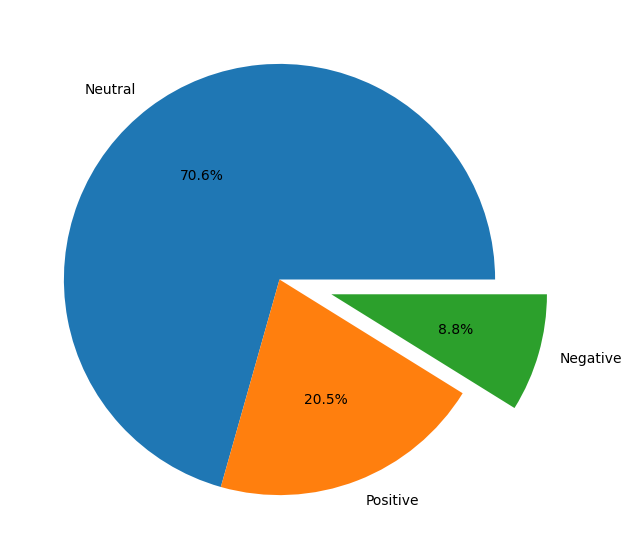

In [25]:
import matplotlib.pyplot as plt

swn_counts= final_data['SWN analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [26]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score

import seaborn as sns; sns.set(font_scale=1.2)

melakukan train model dengan split data perbandingan 90:10

In [27]:
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(final_data['Review'], final_data['SWN analysis'], test_size = 0.1, random_state = 0)

In [28]:
df_train90 = pd.DataFrame()
df_train90['Review'] = train_X
df_train90['label'] = train_Y

df_test10 = pd.DataFrame()
df_test10['Review'] = test_X
df_test10['SWM analysis'] = test_Y

In [31]:
df_train90.head()

,Review,label
653,"tried everything to make it right. Still, noth...",Neutral
405,"On July 17, 2016 I visited the Starbucks on Fe...",Neutral
14,"On June 21, 2023 I purchased coffee and a brea...",Neutral
83,I went through the drive thru at the Starbucks...,Neutral
673,I had accidentally set my alarm the night befo...,Positive


In [30]:
df_test10.head()

,Review,SWM analysis
563,I recently began purchasing coffee each mornin...,Neutral
819,No Review Text,Positive
759,I ordered a latte and a sandwich. The latte ta...,Neutral
604,There was a long black hair in my blended beve...,Neutral
265,The staff was very helpful in my selection of ...,Neutral


menyimpaan data split data train 90 data test 10

In [32]:
import csv
df_train90.to_csv('df_train90.csv')
df_test10.to_csv('df_test10.csv')

## TF-IDF

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect_9010 = TfidfVectorizer(max_features = 5000)
tfidf_vect_9010.fit(data['Review'])
train_X_tfidf_9010 = tfidf_vect_9010.transform(df_train90['Review'])
test_X_tfidf_9010 = tfidf_vect_9010.transform(df_test10['Review'])

In [35]:
print(train_X_tfidf_9010)

  (0, 4952)	0.1042783649088746
  (0, 4936)	0.11404934337898164
  (0, 4893)	0.11673669942147276
  (0, 4884)	0.07158072170556033
  (0, 4864)	0.04576772293160238
  (0, 4795)	0.06518749534956887
  (0, 4782)	0.06821871225580688
  (0, 4678)	0.07188798378586836
  (0, 4617)	0.05326246091535974
  (0, 4479)	0.0811620166288432
  (0, 4410)	0.0695519993806262
  (0, 4388)	0.11786732652922627
  (0, 4351)	0.0811620166288432
  (0, 4350)	0.08813092123490407
  (0, 4346)	0.03683348149922899
  (0, 4335)	0.03661765878386211
  (0, 4334)	0.08553049956230206
  (0, 4320)	0.06752255795703396
  (0, 4319)	0.10417177272759294
  (0, 4313)	0.06796233585453104
  (0, 4307)	0.5119964849428935
  (0, 4261)	0.1235082958262006
  (0, 4078)	0.07884621468426166
  (0, 4006)	0.1419488990924651
  (0, 3923)	0.07158072170556033
  :	:
  (629, 2506)	0.11576296360268526
  (629, 2387)	0.05219255862779154
  (629, 2267)	0.05025893724235272
  (629, 2207)	0.18661407171268604
  (629, 2149)	0.30821699920398693
  (629, 2030)	0.200249490242488

In [36]:
print(test_X_tfidf_9010)

  (0, 4981)	0.08802438158755295
  (0, 4973)	0.07223906643101312
  (0, 4923)	0.1760487631751059
  (0, 4913)	0.06774617476702195
  (0, 4864)	0.04122286470662951
  (0, 4858)	0.049957038310327946
  (0, 4849)	0.050841446943852245
  (0, 4844)	0.06620022992090548
  (0, 4617)	0.0959467100225755
  (0, 4613)	0.12785299087937002
  (0, 4438)	0.10514443057919826
  (0, 4388)	0.10616278336826368
  (0, 4346)	0.09952745257521362
  (0, 4342)	0.14203314617231658
  (0, 4335)	0.06596285317390696
  (0, 4330)	0.08416127178090511
  (0, 4320)	0.12163477197535587
  (0, 4319)	0.09382723496681014
  (0, 4284)	0.10514443057919826
  (0, 4190)	0.09695139510846805
  (0, 4172)	0.20117781782068586
  (0, 4031)	0.024827983664747953
  (0, 4017)	0.0659006068800603
  (0, 3939)	0.07817038329783871
  (0, 3928)	0.06879418761165892
  :	:
  (70, 3708)	0.0797990053907713
  (70, 3552)	0.09175131588427894
  (70, 3421)	0.17540902791519933
  (70, 3387)	0.20126713827802822
  (70, 3386)	0.21802008652801258
  (70, 3385)	0.151218861352266

In [37]:
print(train_X_tfidf_9010.shape)
print(test_X_tfidf_9010.shape)

(630, 5000)
(71, 5000)


melihat kata yang sudah di train

In [38]:
print(tfidf_vect_9010.vocabulary_)

{'and': 421, 'at': 515, 'the': 4320, 'starbucks': 4031, 'on': 3057, 'southwest': 3950, 'are': 466, 'always': 409, 'so': 3904, 'warm': 4788, 'welcoming': 4843, 'there': 4330, 'is': 2379, 'smile': 3875, 'in': 2267, 'their': 4323, 'voice': 4746, 'when': 4864, 'they': 4335, 'greet': 2022, 'you': 4985, 'drive': 1608, 'thru': 4364, 'customer': 1306, 'service': 3708, 'spot': 4004, 'get': 1944, 'my': 2901, 'order': 3077, 'right': 3477, 'with': 4913, 'would': 4954, 'actually': 359, 'give': 1956, 'them': 4325, 'more': 2857, 'than': 4313, 'stars': 4035, 'if': 2232, 'were': 4849, 'available': 549, 'by': 775, 'fire': 1817, 'station': 4048, '436': 186, 'springs': 4010, 'fl': 1825, 'made': 2632, 'day': 1337, 'finally': 1809, 'helped': 2145, 'me': 2707, 'figure': 1801, 'out': 3090, 'way': 4816, 'to': 4388, 'make': 2645, 'drink': 1600, 'love': 2599, 'it': 2387, 'she': 3735, 'took': 4411, 'time': 4376, 'talk': 4247, 'for': 1849, 'minutes': 2798, 'experience': 1740, 'better': 638, 'what': 4858, 'used': 4

## SVM

data di train menggunakan SVM dan testing

In [39]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(train_X_tfidf_9010,train_Y)

SVC(kernel='linear')

In [40]:
from sklearn.metrics import accuracy_score

predictions_SVM_9010 = model.predict(test_X_tfidf_9010)
test_prediction_9010 = pd.DataFrame()
test_prediction_9010['Review'] = test_X
test_prediction_9010['Analysis'] = predictions_SVM_9010
SVM_accuracy_9010 = accuracy_score(predictions_SVM_9010, test_Y)*100
SVM_accuracy_9010 = round(SVM_accuracy_9010,1)

In [41]:
test_prediction_9010.head()

,Review,Analysis
563,I recently began purchasing coffee each mornin...,Neutral
819,No Review Text,Positive
759,I ordered a latte and a sandwich. The latte ta...,Neutral
604,There was a long black hair in my blended beve...,Neutral
265,The staff was very helpful in my selection of ...,Neutral


In [42]:
from sklearn.metrics import accuracy_score

predictions_SVM_9010 = model.predict(test_X_tfidf_9010)
test_prediction_9010 = pd.DataFrame()
test_prediction_9010['Review'] = test_X
test_prediction_9010['Analysis'] = predictions_SVM_9010
SVM_accuracy_9010 = accuracy_score(predictions_SVM_9010, test_Y)*100
SVM_accuracy_9010 = round(SVM_accuracy_9010,1)

In [43]:
test_prediction_9010.to_csv('test_prediction_9010.csv')

In [44]:
SVM_accuracy_9010

77.5

melihat hasil Accuracy, Precision, Recall, f1-score

In [45]:
from sklearn.metrics import classification_report

print ("\nHasil dari klasifikasi menggunakan SVM:")
print (classification_report(test_Y, predictions_SVM_9010))


Hasil dari klasifikasi menggunakan SVM:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         8
     Neutral       0.76      1.00      0.87        52
    Positive       1.00      0.27      0.43        11

    accuracy                           0.77        71
   macro avg       0.59      0.42      0.43        71
weighted avg       0.71      0.77      0.70        71



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
